## Spheres Plot

#### SnC

In [34]:
import json

klist= [40, 45, 50, 55, 60, 65, 70]

md_list= [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

steadiness_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
cohesiveness_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for k in klist:
    with open("./spheres_2_" + str(k) + "_result.json") as emb_json:
        emb_data = json.load(emb_json)
        steadiness_data = emb_data["steadiness"]
        cohesiveness_data = emb_data["cohesivenss"]
        for i, md in enumerate(md_list):
            steadiness_list[i] += steadiness_data[str(md)]['3'] / len(klist)
            cohesiveness_list[i] += cohesiveness_data[str(md)]['3'] / len(klist)
                                                           
print(md_list)
print(steadiness_list)
print(cohesiveness_list)



[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
[0.6271136139449173, 0.6350646942394689, 0.639834917514834, 0.6513726685429291, 0.6598138386092662, 0.6746197214618419, 0.6848464460748976, 0.7035881662944601, 0.7060245178825509, 0.7090228472664396, 0.7170415055234239]
[0.8296495459933585, 0.8219180880652661, 0.8341371797171095, 0.8377156184837905, 0.8547612824576544, 0.8763732334037656, 0.9000197841603953, 0.8931351645344882, 0.8923198168846935, 0.89938423197544, 0.9052229682868506]


#### TnC, MRRE

In [60]:
from helper import *
import sys

sys.path.append("/home/hj/vis2021_snc/metrics4mdp/metrics4mdp")
from provider import MDPMetricProvider

PATH_TO_DATASET = "../../dataset-generator/dataset/"

mlist = ["MRRE_XZ", "MRRE_ZX", "Continuity", "Trustworthiness"]

others_klist = [10, 15, 20, 25, 30, 35, 40]
others_result = {}
for md in md_list:
    others_result[md] = {}
    for m in mlist:
            others_result[md][m] = 0
for k in others_klist:
    print(k)
    for md in md_list:
        mnist_umap_path = make_path(PATH_TO_DATASET, "spheres", "umap", 2, [md, 3])
        emb_data, raw_data, label_data = get_data(mnist_umap_path)


        metricprovider = MDPMetricProvider(raw_data, emb_data, mlist, k=k)
        temp_result =  metricprovider.run()
        for m in mlist:
            others_result[md][m] += temp_result[m]

10
15
20
25
30
35
40


In [66]:
MRRE_LH = [0] * len(md_list)
MRRE_HL = [0] * len(md_list)
Trustworthiness = [0] * len(md_list)
Continuity = [0] * len(md_list)
for i, md in enumerate(md_list):
    MRRE_LH[i] += others_result[md]["MRRE_XZ"] / len(others_klist)
    MRRE_HL[i] += others_result[md]["MRRE_ZX"] / len(others_klist)
    Trustworthiness[i] += others_result[md]["Trustworthiness"] / len(others_klist)
    Continuity[i] += others_result[md]["Continuity"] / len(others_klist)   

print(MRRE_HL)
print(MRRE_LH)
print(Trustworthiness)
print(Continuity)
    

[0.6678797634058322, 0.6685218997971808, 0.6627094491022785, 0.6608807042682284, 0.6579034666324431, 0.6562411392499674, 0.653351580199175, 0.6504243397288298, 0.6478774780855128, 0.645548278108303, 0.6403154139540457]
[0.8338435645998911, 0.8344469013157498, 0.8391248773329268, 0.8344220772193891, 0.8351826399859222, 0.8375099978291465, 0.8304633526353374, 0.8297991699051523, 0.8342941293057018, 0.8323197597451079, 0.8309059022711572]
[0.6482611998217965, 0.6474403585244117, 0.6484904558740199, 0.6479977448813585, 0.6487101788217277, 0.6479573537374174, 0.6480320158610715, 0.6472708471979552, 0.6462325387000426, 0.6441869220304918, 0.6418900067461876]
[0.8249908895358505, 0.8258634114968118, 0.8290462280204399, 0.8258514339714996, 0.8262853615900444, 0.8278795699061993, 0.8209931255343348, 0.8206012375000215, 0.8255209249343489, 0.8221598356611167, 0.8222616613101444]


### Plotting

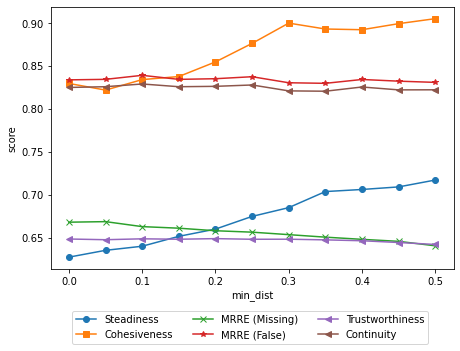

In [106]:
import matplotlib.pyplot as plt
import numpy as np

md_list = np.array(md_list)
s_list = np.array(steadiness_list)
c_list = np.array(cohesiveness_list)

mhl_list = np.array(MRRE_HL)
mlh_list = np.array(MRRE_LH)
t_list = np.array(Trustworthiness)
con_list = np.array(Continuity)

plt.figure(figsize=(6.5, 5))
stead = plt.plot(md_list, s_list, marker='o', label='Steadiness')  
cohev = plt.plot(md_list, c_list, marker='s', label='Cohesiveness')
mhl   = plt.plot(md_list, mhl_list, marker='x', label='MRRE (Missing)')
mlh   = plt.plot(md_list, mlh_list, marker='*', label='MRRE (False)')
truth = plt.plot(md_list, t_list, marker='<', label='Trustworthiness')
conti = plt.plot(md_list, con_list, marker='<', label='Continuity')
plt.xlabel("min_dist")
plt.ylabel("score")
plt.legend(bbox_to_anchor=(0.95, -0.14), ncol=3)

plt.tight_layout()
plt.savefig('plots/spheres_result.svg')